100%|██████████| 9.91M/9.91M [00:00<00:00, 11.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.80MB/s]


Epoch 1, Loss: 0.1802
Epoch 2, Loss: 0.0780
Epoch 3, Loss: 0.0599
Epoch 4, Loss: 0.0480
Epoch 5, Loss: 0.0419
Test Accuracy: 99.05%


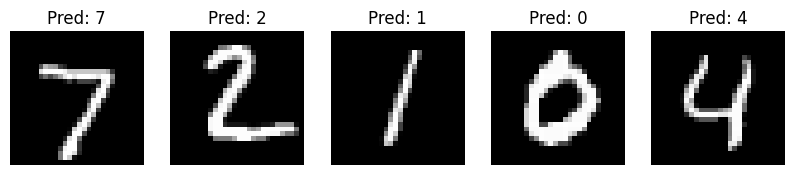

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

# 2. Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            nn.Flatten(),
            nn.Linear(9216, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training loop
def train(model, loader):
    model.train()
    for epoch in range(5):
        total_loss = 0
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader):.4f}")

train(model, train_loader)

# 5. Evaluation
def test(model, loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            output = model(X)
            pred = output.argmax(dim=1)
            correct += pred.eq(y).sum().item()
    print(f"Test Accuracy: {correct / len(loader.dataset) * 100:.2f}%")

test(model, test_loader)

# 6. Visualize predictions
def visualize_predictions(model, loader):
    model.eval()
    images, labels = next(iter(loader))
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        output = model(images[:5])
    preds = output.argmax(dim=1)

    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"Pred: {preds[i].item()}")
        plt.axis('off')
    plt.show()

visualize_predictions(model, test_loader)
